In [5]:
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings

In [6]:
train_df = pd.read_csv("uconn_comp_2018_train.csv", parse_dates=["claim_date"])
test_df = pd.read_csv("uconn_comp_2018_test.csv", parse_dates=["claim_date"])

In [7]:
train_df.describe(include='all')

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
count,17998.000000,17998.000000,17998,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998,17998.000000,...,17998.000000,17998,17998.000000,17981.000000,17990.000000,17998,17998.000000,17998,17998.000000,17998.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,3,NaN,NaN,NaN,3,NaN,7,NaN,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,Own,NaN,...,NaN,Broker,NaN,NaN,NaN,Compact,NaN,black,NaN,NaN
freq,NaN,NaN,9414,NaN,NaN,NaN,NaN,NaN,9969,NaN,...,NaN,9633,NaN,NaN,NaN,6063,NaN,2620,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,14970.601622,43.695466,NaN,0.712722,73.562951,37367.655684,0.699189,0.577286,NaN,49875.595955,...,49.423269,NaN,0.600678,4975.792083,5.008060,NaN,23089.123114,NaN,23031.322385,0.156295
std,8659.940765,11.959819,NaN,0.452505,15.346807,2957.297249,0.458623,0.494004,NaN,29214.655149,...,33.678470,NaN,0.489773,2215.706510,2.258391,NaN,11988.429767,NaN,12052.385584,0.363604
min,1.000000,18.000000,NaN,0.000000,1.000000,-1.000000,0.000000,0.000000,NaN,0.000000,...,0.000000,NaN,0.000000,282.639432,0.000000,NaN,2457.329316,NaN,2429.429302,-1.000000
25%,7479.250000,35.000000,NaN,0.000000,65.000000,35554.000000,0.000000,0.000000,NaN,20111.000000,...,17.000000,NaN,0.000000,3337.029436,3.000000,NaN,14279.574850,NaN,14164.122133,0.000000


In [8]:
train_df['gender'].dtype

dtype('O')

In [9]:
#dropping row with fraud =-1
train_df = train_df[train_df['fraud']!= -1]

In [10]:
#checking percent of missing values train data
total = train_df.isnull().sum().sort_values(ascending = False)
percent = (train_df.isnull().sum()/train_df.count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_train_data

,Total,Percent
witness_present_ind,132,0.738958
claim_est_payout,17,0.094560
age_of_vehicle,8,0.044477
marital_status,5,0.027793
fraud,0,0.000000
claim_date,0,0.000000
age_of_driver,0,0.000000
gender,0,0.000000
safty_rating,0,0.000000
annual_income,0,0.000000


In [11]:
#checking percent of missing values test data
total1 = test_df.isnull().sum().sort_values(ascending = False)
percent1 = (test_df.isnull().sum()/test_df.count()*100).sort_values(ascending = False)
missing_test_data  = pd.concat([total1, percent1], axis=1, keys=['Total','Percent'])
missing_test_data

,Total,Percent
witness_present_ind,88,0.738627
claim_est_payout,14,0.116783
age_of_vehicle,3,0.025002
marital_status,2,0.016667
vehicle_weight,0,0.000000
zip_code,0,0.000000
age_of_driver,0,0.000000
gender,0,0.000000
safty_rating,0,0.000000
annual_income,0,0.000000


In [12]:
train_df.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17995.000000,17995.000000,17990.000000,17995.000000,17995.000000,17995.000000,17995.000000,17995.000000,17995.000000,17863.000000,17995.000000,17995.000000,17978.000000,17987.000000,17995.000000,17995.000000,17995.000000
mean,14970.468352,43.696193,0.712674,73.562879,37367.782940,0.699250,0.577271,49870.288302,0.504918,0.232716,49.429286,0.600778,4975.640673,5.007895,23090.558736,23031.591635,0.156488
std,8659.446913,11.960422,0.452528,15.347390,2957.458451,0.458597,0.494007,29214.181840,0.955504,0.422574,33.677937,0.489752,2215.818263,2.258371,11988.794310,12052.661459,0.363327
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.500000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3336.979610,3.000000,14279.686540,14164.267235,0.000000
50%,14965.000000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.347789,5.000000,20955.918110,20837.923870,0.000000
75%,22467.500000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.744582,6.000000,29563.713610,29429.861945,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


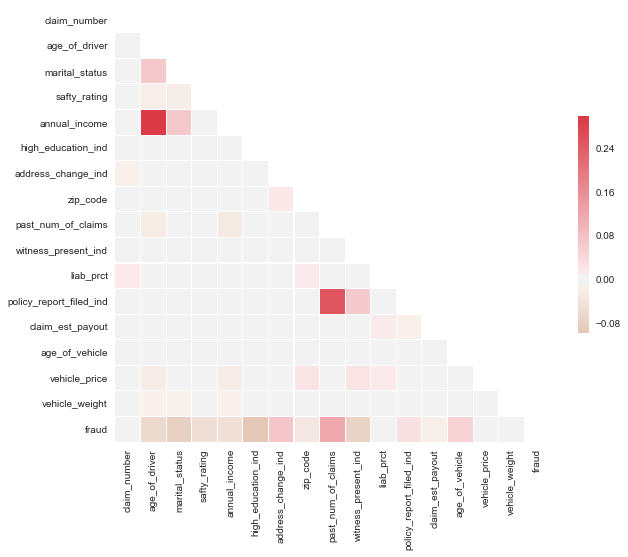

In [13]:
#Correlation in the dataset
corr = train_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(30, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5});

In [14]:
#Imputation of values

#Marital Status count
print(train_df['marital_status'].value_counts())
#replace null by random choice of 0 and 1 in train data
train_df['marital_status'] = train_df.apply(lambda row: random.choice([1,0]) if np.isnan(row['marital_status']) else row['marital_status'],axis=1)

#Marital Status count
print(test_df['marital_status'].value_counts())
#replace null by random choice of 0 and 1 in test data
test_df['marital_status'] = test_df.apply(lambda row: random.choice([1,0]) if np.isnan(row['marital_status']) else row['marital_status'],axis=1)

1.0    12821
0.0     5169
Name: marital_status, dtype: int64
1.0    8582
0.0    3418
Name: marital_status, dtype: int64


In [15]:
#handling annual_income = -1
#print(train_df[train_df['annual_income']==-1])
#print(test_df[test_df['annual_income']==-1])

#replacing -1 with the median annual income
train_df['annual_income'] = np.where(train_df['annual_income']<0, np.median(train_df['annual_income']), train_df['annual_income'])
test_df['annual_income'] = np.where(test_df['annual_income']<0, np.median(test_df['annual_income']), test_df['annual_income'])

In [16]:
train_df[train_df['claim_number']==10540]

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
6359,10540,40,M,1.0,56,36888.0,0,1,Own,80033,...,50,Online,0,5811.031799,5.0,Compact,24415.10141,black,57962.25637,0


In [17]:
#handling zipcodes

print(train_df['zip_code'].dtype)
print(test_df['zip_code'].dtype)

#converting dtype to object
train_df['zip_code'] = train_df['zip_code'].astype(str)
test_df['zip_code'] = test_df['zip_code'].astype(str)

print(train_df['zip_code'].dtype)
print(test_df['zip_code'].dtype)
#train_df[train_df['zip_code']=="0"]
#test_df[test_df['zip_code']=="0"]

#train_df['zip_code'].replace("0","00000")
#test_df['zip_code'].replace("0","00000")

#replacing 0 with 00000
train_df['zip_code'] = np.where(train_df['zip_code']=='0','00000',train_df['zip_code'])
test_df['zip_code'] = np.where(test_df['zip_code']=='0','00000',test_df['zip_code'])

#taking region from zipcode
train_df['zip_region'] = train_df['zip_code'].str[0].astype(str)
test_df['zip_region'] = test_df['zip_code'].str[0].astype(str)

int64
int64
object
object


In [18]:
# date time features train
#train_df['weekday'] = train_df.claim_date.dt.weekday
train_df['month'] = train_df.claim_date.dt.month.astype(str)
train_df['day'] = train_df.claim_date.dt.day.astype(str)
train_df['week'] = train_df.claim_date.dt.week.astype(str)
train_df['year'] = train_df.claim_date.dt.year.astype(str)

# date time features test
#test_df['weekday'] = test_df.claim_date.dt.weekday
test_df['month'] = test_df.claim_date.dt.month.astype(str)
test_df['day'] = test_df.claim_date.dt.day.astype(str)
test_df['week'] = test_df.claim_date.dt.week .astype(str)
test_df['year'] = test_df.claim_date.dt.year.astype(str)

In [19]:
#fixing age of vehicles missing values
#print(train_df['age_of_vehicle'].value_counts())
#print(test_df['age_of_vehicle'].value_counts())


#replacing missing with random choice
train_df['age_of_vehicle'] = train_df.apply(lambda row: random.choice([3,4,5,6,7]) if np.isnan(row['age_of_vehicle']) else row['age_of_vehicle'],axis=1)
test_df['age_of_vehicle'] = test_df.apply(lambda row: random.choice([3,4,5,6,7]) if np.isnan(row['age_of_vehicle']) else row['age_of_vehicle'],axis=1)

#train_df['age_of_vehicle'][train_df['claim_number'].isin(['607','664','5432','5490','7663','16883','20750','27010'])]

In [20]:
#fixing witness present indicator missing values
print(train_df['witness_present_ind'].value_counts())
print(test_df['witness_present_ind'].value_counts())

#replacing missing with random choice
train_df['witness_present_ind'] = train_df.apply(lambda row: random.choice([0,0,1]) if np.isnan(row['witness_present_ind']) else row['witness_present_ind'],axis=1)
test_df['witness_present_ind'] = test_df.apply(lambda row: random.choice([0,0,1]) if np.isnan(row['witness_present_ind']) else row['witness_present_ind'],axis=1)

#fixing witness present indicator missing values
print(train_df['witness_present_ind'].value_counts())
print(test_df['witness_present_ind'].value_counts())

0.0    13706
1.0     4157
Name: witness_present_ind, dtype: int64
0.0    9070
1.0    2844
Name: witness_present_ind, dtype: int64
0.0    13796
1.0     4199
Name: witness_present_ind, dtype: int64
0.0    9124
1.0    2878
Name: witness_present_ind, dtype: int64


In [21]:
#fixing claim_est_payout missing values

#replacing null with the median annual income
train_df['claim_est_payout'] = np.where(pd.isnull(train_df['claim_est_payout']), np.mean(train_df['claim_est_payout']), train_df['claim_est_payout'])
test_df['claim_est_payout'] = np.where(pd.isnull(test_df['claim_est_payout']), np.mean(test_df['claim_est_payout']), test_df['claim_est_payout'])

In [22]:
#fixing datatypes
train_df['marital_status'] = train_df['marital_status'].astype(str)
train_df['high_education_ind'] = train_df['high_education_ind'].astype(str)
train_df['address_change_ind'] = train_df['address_change_ind'].astype(str)
train_df['witness_present_ind'] = train_df['witness_present_ind'].astype(str)
train_df['policy_report_filed_ind'] = train_df['policy_report_filed_ind'].astype(str)

test_df['marital_status'] = test_df['marital_status'].astype(str)
test_df['high_education_ind'] = test_df['high_education_ind'].astype(str)
test_df['address_change_ind'] = test_df['address_change_ind'].astype(str)
test_df['witness_present_ind'] = test_df['witness_present_ind'].astype(str)
test_df['policy_report_filed_ind'] = test_df['policy_report_filed_ind'].astype(str)

In [23]:
#Dropping unwanted columns
train_df.drop(['claim_number','claim_date'],axis=1,inplace=True)
test_df.drop(['claim_number','claim_date'],axis=1,inplace=True)

#dropping columns with missing values (temp)
#train_df.dropna(axis=0,inplace=True)
#train_df.dropna(axis=0,inplace=True)

#train_df.drop(['claim_number','vehicle_weight','vehicle_price','liab_prct','zip_code'],axis=1,inplace=True)
#test_df.drop(['claim_number','vehicle_weight','vehicle_price','liab_prct','zip_code'],axis=1,inplace=True)

In [24]:
import seaborn as sns
from scipy import stats
#sns.boxplot(x=train_df['vehicle_weight'])
#numeric_cols = train_df.select_dtypes(include=[np.number]).columns
#z_score = np.abs(stats.zscore(train_df[numeric_cols]))
#z_df = pd.DataFrame(z_score,columns=numeric_cols)
#train_df = pd.concat([train_df,z_df],axis=1)
#train_df.describe()

In [25]:
#outlier treatment
train_df = train_df[np.abs(train_df.age_of_driver-train_df.age_of_driver.mean()) <= (3*train_df.age_of_driver.std())]
train_df = train_df[np.abs(train_df.safty_rating-train_df.safty_rating.mean()) <= (3*train_df.safty_rating.std())]
train_df = train_df[np.abs(train_df.annual_income-train_df.annual_income.mean()) <= (3*train_df.annual_income.std())]
train_df = train_df[np.abs(train_df.past_num_of_claims-train_df.past_num_of_claims.mean()) <= (3*train_df.past_num_of_claims.std())]
train_df = train_df[np.abs(train_df.liab_prct-train_df.liab_prct.mean()) <= (3*train_df.liab_prct.std())]
train_df = train_df[np.abs(train_df.claim_est_payout-train_df.claim_est_payout.mean()) <= (3*train_df.claim_est_payout.std())]
train_df = train_df[np.abs(train_df.age_of_vehicle-train_df.age_of_vehicle.mean()) <= (3*train_df.age_of_vehicle.std())]
train_df = train_df[np.abs(train_df.vehicle_price-train_df.vehicle_price.mean()) <= (3*train_df.vehicle_price.std())]
train_df = train_df[np.abs(train_df.vehicle_weight-train_df.vehicle_weight.mean()) <= (3*train_df.vehicle_weight.std())]

In [27]:
train_df.describe(include="all")

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_day_of_week,...,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,zip_region,month,day,week,year
count,16688.000000,16688,16688,16688.000000,16688.000000,16688,16688,16688,16688,16688,...,16688,16688.000000,16688,16688.000000,16688.000000,16688,16688,16688,16688,16688
unique,NaN,2,2,NaN,NaN,2,2,2,276,7,...,3,NaN,7,NaN,NaN,5,12,31,53,2
top,NaN,M,1.0,NaN,NaN,1,1,Own,15001,Saturday,...,Compact,NaN,silver,NaN,NaN,8,8,1,34,2015
freq,NaN,8711,11874,NaN,NaN,11672,9615,9235,261,2471,...,5603,NaN,2426,NaN,NaN,6631,1501,588,371,8465
mean,43.451222,NaN,NaN,74.176354,37360.198586,NaN,NaN,NaN,NaN,NaN,...,NaN,22583.317731,NaN,22531.601995,0.151726,NaN,NaN,NaN,NaN,NaN
std,11.418047,NaN,NaN,14.193751,2703.728887,NaN,NaN,NaN,NaN,NaN,...,NaN,11046.268226,NaN,11084.613554,0.358766,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,28.000000,29420.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,2457.329316,NaN,2429.429302,0.000000,NaN,NaN,NaN,NaN,NaN
25%,35.000000,NaN,NaN,66.000000,35553.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,14188.518500,NaN,14094.205267,0.000000,NaN,NaN,NaN,NaN,NaN
50%,43.000000,NaN,NaN,77.000000,37609.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,20760.679200,NaN,20666.070025,0.000000,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,85.000000,39314.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,29223.165085,NaN,29046.247700,0.000000,NaN,NaN,NaN,NaN,NaN


In [28]:
#Encoding variables
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
#train_df
train_df['gender'] = (number.fit_transform(train_df['gender'].astype(str))).astype(str)
train_df['living_status'] = (number.fit_transform(train_df['living_status'].astype(str))).astype(str)
train_df['claim_day_of_week'] = (number.fit_transform(train_df['claim_day_of_week'].astype(str))).astype(str)
train_df['accident_site'] = (number.fit_transform(train_df['accident_site'].astype(str))).astype(str)
train_df['channel'] = (number.fit_transform(train_df['channel'].astype(str))).astype(str)
train_df['vehicle_category'] = (number.fit_transform(train_df['vehicle_category'].astype(str))).astype(str)
train_df['vehicle_color'] = (number.fit_transform(train_df['vehicle_color'].astype(str))).astype(str)
train_df['zip_region'] = (number.fit_transform(train_df['zip_region'].astype(str))).astype(str)

#test_df
test_df['gender'] = (number.fit_transform(test_df['gender'].astype(str))).astype(str)
test_df['living_status'] = (number.fit_transform(test_df['living_status'].astype(str))).astype(str)
test_df['claim_day_of_week'] = (number.fit_transform(test_df['claim_day_of_week'].astype(str))).astype(str)
test_df['accident_site'] = (number.fit_transform(test_df['accident_site'].astype(str))).astype(str)
test_df['channel'] = (number.fit_transform(test_df['channel'].astype(str))).astype(str)
test_df['vehicle_category'] = (number.fit_transform(test_df['vehicle_category'].astype(str))).astype(str)
test_df['vehicle_color'] = (number.fit_transform(test_df['vehicle_color'].astype(str))).astype(str)
test_df['zip_region'] = (number.fit_transform(test_df['zip_region'].astype(str))).astype(str)

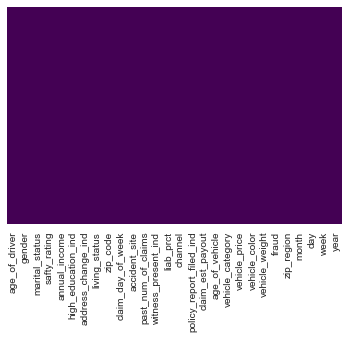

In [29]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

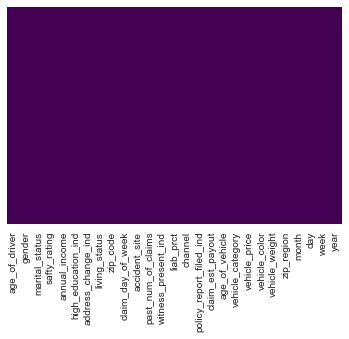

In [30]:
test_df.fillna(test_df.mean(), inplace=True)
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
# Check duplicates row
print(sum(train_df.duplicated()))
print(sum(test_df.duplicated()))

0
0


#encoding categorical variables
gender = pd.get_dummies(train_df['gender'])
living_status = pd.get_dummies(train_df['living_status'])
claim_day_of_week= pd.get_dummies(train_df['claim_day_of_week'])
accident_site= pd.get_dummies(train_df['accident_site'])
channel= pd.get_dummies(train_df['channel'])
vehicle_category= pd.get_dummies(train_df['vehicle_category'])
vehicle_color= pd.get_dummies(train_df['vehicle_color'])
#marital_status= pd.get_dummies(train_df['marital_status'])
#high_education_ind= pd.get_dummies(train_df['high_education_ind'])
#address_change_ind= pd.get_dummies(train_df['address_change_ind'])
#witness_present_ind= pd.get_dummies(train_df['witness_present_ind'])
#policy_report_filed_ind= pd.get_dummies(train_df['policy_report_filed_ind'])
#zip_code= pd.get_dummies(train_df['zip_code'])


#dropping original columns and replacing by dummy columns
train_df.drop(['claim_date','gender','living_status','claim_day_of_week','accident_site','channel','vehicle_category','vehicle_color','marital_status','high_education_ind','address_change_ind','witness_present_ind','policy_report_filed_ind','zip_code'],axis=1,inplace=True)
train_df = pd.concat([train_df,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,marital_status,high_education_ind,address_change_ind,witness_present_ind,policy_report_filed_ind,zip_code],axis=1)

#encoding categorical variables
gender = pd.get_dummies(test_df['gender'])
living_status = pd.get_dummies(test_df['living_status'])
claim_day_of_week= pd.get_dummies(test_df['claim_day_of_week'])
accident_site= pd.get_dummies(test_df['accident_site'])
channel= pd.get_dummies(test_df['channel'])
vehicle_category= pd.get_dummies(test_df['vehicle_category'])
vehicle_color= pd.get_dummies(test_df['vehicle_color'])
#marital_status= pd.get_dummies(test_df['marital_status'])
#high_education_ind= pd.get_dummies(test_df['high_education_ind'])
#address_change_ind= pd.get_dummies(test_df['address_change_ind'])
#witness_present_ind= pd.get_dummies(test_df['witness_present_ind'])
#policy_report_filed_ind= pd.get_dummies(test_df['policy_report_filed_ind'])
#zip_code= pd.get_dummies(test_df['zip_code'])


#dropping original columns and replacing by dummy columns
test_df.drop(['claim_date','gender','living_status','claim_day_of_week','accident_site','channel','vehicle_category','vehicle_color','marital_status','high_education_ind','address_change_ind','witness_present_ind','policy_report_filed_ind','zip_code'],axis=1,inplace=True)
test_df = pd.concat([test_df,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color,marital_status,high_education_ind,address_change_ind,witness_present_ind,policy_report_filed_ind,zip_code],axis=1)

In [32]:
test_df.describe(include ="all")

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_day_of_week,...,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,zip_region,month,day,week,year
count,12002.000000,12002,12002,12002.000000,12002.000000,12002,12002,12002,12002,12002,...,12002.000000,12002,12002.000000,12002,12002.000000,12002,12002,12002,12002,12002
unique,NaN,2,2,NaN,NaN,2,2,2,276,7,...,NaN,3,NaN,7,NaN,5,12,31,53,2
top,NaN,1,1.0,NaN,NaN,1,1,0,15012,1,...,NaN,0,NaN,4,NaN,4,3,3,49,2016
freq,NaN,6216,8584,NaN,NaN,8379,6922,6639,210,1746,...,NaN,4033,NaN,1766,NaN,4746,1060,433,258,6101
mean,43.525162,NaN,NaN,73.702966,37356.571988,NaN,NaN,NaN,NaN,NaN,...,4.969172,NaN,22925.335594,NaN,22860.701764,NaN,NaN,NaN,NaN,NaN
std,12.201298,NaN,NaN,15.378967,2762.650338,NaN,NaN,NaN,NaN,NaN,...,2.227099,NaN,12108.888412,NaN,12198.142508,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,2.000000,29432.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,2261.507903,NaN,2583.428985,NaN,NaN,NaN,NaN,NaN
25%,35.000000,NaN,NaN,66.000000,35550.250000,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,14087.559950,NaN,13832.434587,NaN,NaN,NaN,NaN,NaN
50%,43.000000,NaN,NaN,76.000000,37606.000000,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,20642.029325,NaN,20508.293695,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,85.000000,39313.000000,NaN,NaN,NaN,NaN,NaN,...,6.000000,NaN,29293.641235,NaN,29205.553660,NaN,NaN,NaN,NaN,NaN


In [33]:
train_df.describe(include="all")

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_day_of_week,...,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,zip_region,month,day,week,year
count,16688.000000,16688,16688,16688.000000,16688.000000,16688,16688,16688,16688,16688,...,16688,16688.000000,16688,16688.000000,16688.000000,16688,16688,16688,16688,16688
unique,NaN,2,2,NaN,NaN,2,2,2,276,7,...,3,NaN,7,NaN,NaN,5,12,31,53,2
top,NaN,1,1.0,NaN,NaN,1,1,0,15001,2,...,0,NaN,5,NaN,NaN,4,8,1,34,2015
freq,NaN,8711,11874,NaN,NaN,11672,9615,9235,261,2471,...,5603,NaN,2426,NaN,NaN,6631,1501,588,371,8465
mean,43.451222,NaN,NaN,74.176354,37360.198586,NaN,NaN,NaN,NaN,NaN,...,NaN,22583.317731,NaN,22531.601995,0.151726,NaN,NaN,NaN,NaN,NaN
std,11.418047,NaN,NaN,14.193751,2703.728887,NaN,NaN,NaN,NaN,NaN,...,NaN,11046.268226,NaN,11084.613554,0.358766,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,28.000000,29420.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,2457.329316,NaN,2429.429302,0.000000,NaN,NaN,NaN,NaN,NaN
25%,35.000000,NaN,NaN,66.000000,35553.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,14188.518500,NaN,14094.205267,0.000000,NaN,NaN,NaN,NaN,NaN
50%,43.000000,NaN,NaN,77.000000,37609.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,20760.679200,NaN,20666.070025,0.000000,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,85.000000,39314.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,29223.165085,NaN,29046.247700,0.000000,NaN,NaN,NaN,NaN,NaN


In [34]:
#for checking predictions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to divide train and test set
from sklearn.model_selection import train_test_split
X_train = train_df.drop('fraud',axis=1)
Y_train = train_df['fraud']
X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.02,random_state=0)
X_train.shape, X_test.shape

X_train_columns = X_train.columns

In [35]:
#checking the distribution of fraud in train and test sets

print(Y_test.value_counts(normalize=True))
print(Y_train.value_counts(normalize=True))

0    0.865269
1    0.134731
Name: fraud, dtype: float64
0    0.847927
1    0.152073
Name: fraud, dtype: float64


In [36]:
#scaling variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_final = scaler.transform(test_df)

#scaling the final test file
X_final = scaler.transform(test_df)

In [37]:
#fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, Y_test)))

pred_logmodel = logmodel.predict(X_test)
print(confusion_matrix(Y_test, pred_logmodel))
print(classification_report(Y_test, pred_logmodel))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.87
[[288   1]
 [ 43   2]]
             precision    recall  f1-score   support

          0       0.87      1.00      0.93       289
          1       0.67      0.04      0.08        45

avg / total       0.84      0.87      0.82       334



In [38]:
#fit a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, Y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

pred_clf = clf.predict(X_test)
print(confusion_matrix(Y_test, pred_clf))
print(classification_report(Y_test, pred_clf))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.73
[[238  51]
 [ 40   5]]
             precision    recall  f1-score   support

          0       0.86      0.82      0.84       289
          1       0.09      0.11      0.10        45

avg / total       0.75      0.73      0.74       334



In [39]:
#fit a knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

pred_knn = knn.predict(X_test)
print(confusion_matrix(Y_test, pred_knn))
print(classification_report(Y_test, pred_knn))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.85
[[281   8]
 [ 41   4]]
             precision    recall  f1-score   support

          0       0.87      0.97      0.92       289
          1       0.33      0.09      0.14        45

avg / total       0.80      0.85      0.81       334



In [40]:
#fit a lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, Y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, Y_test)))

pred_lda = lda.predict(X_test)
print(confusion_matrix(Y_test, pred_lda))
print(classification_report(Y_test, pred_lda))

Accuracy of LDA classifier on training set: 0.85
Accuracy of LDA classifier on test set: 0.87
[[286   3]
 [ 42   3]]
             precision    recall  f1-score   support

          0       0.87      0.99      0.93       289
          1       0.50      0.07      0.12        45

avg / total       0.82      0.87      0.82       334



In [41]:
#fit a naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, Y_test)))

pred_gnb = gnb.predict(X_test)
print(confusion_matrix(Y_test, pred_gnb))
print(classification_report(Y_test, pred_gnb))

Accuracy of GNB classifier on training set: 0.84
Accuracy of GNB classifier on test set: 0.86
[[281   8]
 [ 39   6]]
             precision    recall  f1-score   support

          0       0.88      0.97      0.92       289
          1       0.43      0.13      0.20        45

avg / total       0.82      0.86      0.83       334



In [42]:
#fit a svm classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, Y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, Y_test)))

pred_svm = svm.predict(X_test)
print(confusion_matrix(Y_test, pred_svm))
print(classification_report(Y_test, pred_svm))

Accuracy of SVM classifier on training set: 0.85
Accuracy of SVM classifier on test set: 0.87
[[289   0]
 [ 45   0]]
             precision    recall  f1-score   support

          0       0.87      1.00      0.93       289
          1       0.00      0.00      0.00        45

avg / total       0.75      0.87      0.80       334



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [43]:
#fit a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'
     .format(rfc.score(X_train, Y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'
     .format(rfc.score(X_test, Y_test)))

pred_rfc = rfc.predict(X_test)
print(confusion_matrix(Y_test, pred_rfc))
print(classification_report(Y_test, pred_rfc))

Accuracy of Random Forest Classifier on training set: 0.98
Accuracy of Random Forest Classifier on test set: 0.87
[[289   0]
 [ 45   0]]
             precision    recall  f1-score   support

          0       0.87      1.00      0.93       289
          1       0.00      0.00      0.00        45

avg / total       0.75      0.87      0.80       334



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



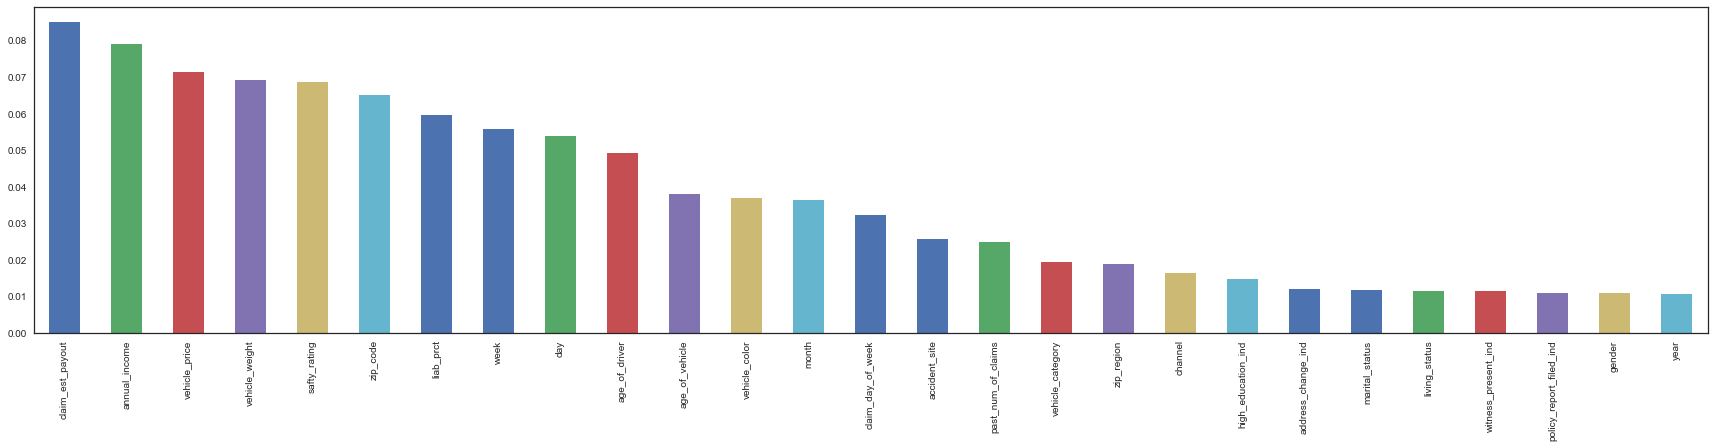

In [44]:
# Random Forest feature importance
importance = pd.Series(rfc.feature_importances_)
importance.index = X_train_columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(30,6))

In [45]:
#fit a xgboost classifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

eval_set = [(X_test,Y_test)]
xgb_model.fit(X_train,Y_train, eval_set=eval_set, verbose=False)
print('Accuracy of XGboost on training set: {:.2f}'
     .format(xgb_model.score(X_train, Y_train)))
print('Accuracy of XGboost on test set: {:.2f}'
     .format(xgb_model.score(X_test, Y_test)))

pred_xgb = xgb_model.predict(X_test)
print(confusion_matrix(Y_test, pred_xgb))
print(classification_report(Y_test, pred_xgb))
#pred = xgb_model.predict(X_train[training_vars])
#print('xgb train mse: {}'.format(mean_squared_error(y_train, pred)))
#pred = xgb_model.predict(X_test[training_vars])
#print('xgb test mse: {}'.format(mean_squared_error(y_test, pred)))

Accuracy of XGboost on training set: 0.85
Accuracy of XGboost on test set: 0.87
[[289   0]
 [ 44   1]]
             precision    recall  f1-score   support

          0       0.87      1.00      0.93       289
          1       1.00      0.02      0.04        45

avg / total       0.89      0.87      0.81       334



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [55]:
#run lightgbm
import lightgbm as lgb

# Custom function for lgb
def run_lgb(X_train,Y_train,X_test,Y_test):
    params = {
        "objective" : "binary",
        "metric" : "binary_error",
        "num_leaves" : 10,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(X_train, label=Y_train)
    lgval = lgb.Dataset(X_test, label=Y_test)
    evals_result_lightgbm = {}
    model_lightgbm = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=20, evals_result=evals_result_lightgbm)
    
   # pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return  model_lightgbm, evals_result_lightgbm

# Training the model
model_lightgbm, evals_result_lightgbm = run_lgb(X_train,Y_train,X_test,Y_test)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's binary_error: 0.134731
[40]	valid_0's binary_error: 0.134731
[60]	valid_0's binary_error: 0.131737
[80]	valid_0's binary_error: 0.131737
[100]	valid_0's binary_error: 0.131737
[120]	valid_0's binary_error: 0.131737
[140]	valid_0's binary_error: 0.128743
[160]	valid_0's binary_error: 0.128743
[180]	valid_0's binary_error: 0.128743
[200]	valid_0's binary_error: 0.125749
[220]	valid_0's binary_error: 0.125749
[240]	valid_0's binary_error: 0.125749
[260]	valid_0's binary_error: 0.128743
[280]	valid_0's binary_error: 0.128743
Early stopping, best iteration is:
[189]	valid_0's binary_error: 0.122754


In [56]:
model_lightgbm.num_trees()

189

In [57]:
#predictng and writing output file
pred_lgbm = model_lightgbm.predict(X_final)
pd.DataFrame(pred_lgbm).to_csv('pred_lgbm_nov02_v3.csv',sep=',')

In [ ]:
#gnb_prob = gnb.predict_proba(X_final)

In [ ]:
#pd.DataFrame(gnb_prob).to_csv('output.csv',sep=',')

In [ ]:
#lda_prob = lda.predict_proba(X_final)

In [ ]:
#pd.DataFrame(lda_prob).to_csv('pred_oct12_v1.csv',sep=',')

In [44]:
#xgb_model_pred = xgb_model.predict_proba(X_final)
#pd.DataFrame(xgb_model_pred).to_csv('xgb_oct17_v1.csv',sep=',')

# Extra Content
importance = pd.Series(np.abs(logmodel.coef_[2:].ravel()))
importance.index = X_train_columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

# dropping unimportant columns
train_df_1 = train_df.filter(['safty_rating','annual_income','claim_est_payout','age_of_driver','year','age_of_vehicle'
,'past_num_of_claims','week','day','liab_prct'])
test_df_1 = test_df.filter(['safty_rating','annual_income','claim_est_payout','age_of_driver','year','age_of_vehicle'
,'past_num_of_claims','week','day','liab_prct'])
# to divide train and test set
from sklearn.model_selection import train_test_split
X_train_2 = train_df_1
Y_train = train_df['fraud']
#fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logmodel2 = LogisticRegression()
logmodel2.fit(X_train_2,Y_train)
#predictions
predictions2 = pd.DataFrame(data=logmodel2.predict(test_df_1))
predictions2_prob = pd.DataFrame(data=logmodel2.predict_proba(test_df_1))
predictions2 = pd.concat([predictions2,predictions2_prob],axis=1)